# Jackknife Aplicado a datos

- Autor: Francine Palacios
- Ramo: Topicos Avanzados
- Profesor: Ronny Vallejos
- Descripcion: Este cuaderno Jupyter está dedicado al análisis exhaustivo de los parámetros obtenidos de un modelo de **regresión logística**. Se emplea el método de remuestreo Jackknife para estimar la precisión y la confiabilidad de los parámetros estimados. El conjunto de datos utilizado proviene de registros de admisión a programas de posgrado, el cual está disponible para el público por la plataforma [kaggle](https://www.kaggle.com/) 

## Paquetes a utilizar

Se utilizaran principalmente paquetes de manejo de datos

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

## Carga de datos


### Contexto
Este conjunto de datos fue creado para predecir las admisiones a programas de posgrado desde una perspectiva india. En el proceso de solicitud para programas de maestría, las instituciones educativas suelen considerar varios factores para determinar la idoneidad de un candidato.

### Contenido
El conjunto de datos contiene varios parámetros que se consideran importantes durante la solicitud para programas de maestría:

- **GRE (Graduate Record Examination)**: El GRE es un examen estandarizado que mide la aptitud verbal, cuantitativa y analítica de los estudiantes. Los puntajes de GRE están en una escala de 0 a 340.

- **TOEFL (Test of English as a Foreign Language)**: El TOEFL es un examen estandarizado que evalúa la capacidad de comprensión auditiva, expresión oral, comprensión de lectura y expresión escrita en inglés de personas cuya lengua materna no es el inglés. Los puntajes de TOEFL van de 0 a 120.

- **University Rating**: Esta calificación es una medida subjetiva de la reputación y calidad de la institución donde el solicitante obtuvo su título de pregrado. Se clasifica en una escala del 1 al 5, donde 1 indica una universidad de menor prestigio y 5 indica una universidad altamente prestigiosa.

- **Statement of Purpose (SOP) and Letter of Recommendation Strength (LOR)**: Estos factores evalúan la calidad y persuasión de la declaración de propósito del solicitante, así como la fuerza y credibilidad de las cartas de recomendación proporcionadas por sus referencias académicas o profesionales. Ambos se califican en una escala del 1 al 5.

- **Undergraduate GPA (CGPA)**: El GPA (Promedio de Calificaciones) de pregrado es un indicador de rendimiento académico durante los estudios universitarios de pregrado. Se clasifica en una escala del 0 al 10.

- **Experiencia en Investigación (Research)**: Este parámetro indica si el solicitante tiene experiencia previa en investigación, con un valor de 1 si la tiene y 0 si no la tiene.

- **Chance of Admit**: Esta es la variable objetivo que se busca predecir. Representa la probabilidad de que un solicitante sea admitido en el programa de posgrado y está en un rango de 0 a 1.

### Aclaraciones

Para aclarar, la "Probabilidad de Admisión" es un parámetro que se les preguntó a los individuos (algunos valores fueron ingresados manualmente) antes de conocer los resultados de su solicitud. En palabras del autor: 

"Para algunos perfiles, pregunté a los solicitantes qué tan seguros estaban de ser admitidos en términos de porcentaje. Agregué un decimal adicional para aumentar la precisión. Para el resto de los datos, dado que la regresión es un aprendizaje supervisado, proporcioné valores que realmente fueran comprensibles y tuvieran suficiente sentido" 


- https://www.kaggle.com/datasets/mohansacharya/graduate-admissions/discussion/79063




In [2]:
path=r'Data\Admission_Predict_Ver1.1.csv'
df_data= pd.read_csv(path)
df_data = df_data.drop(columns=['Serial No.'])
df_data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


## Analisis Descriptivo

In [3]:
df_data.describe()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


A continuacion se entrega un histograma de cada columna

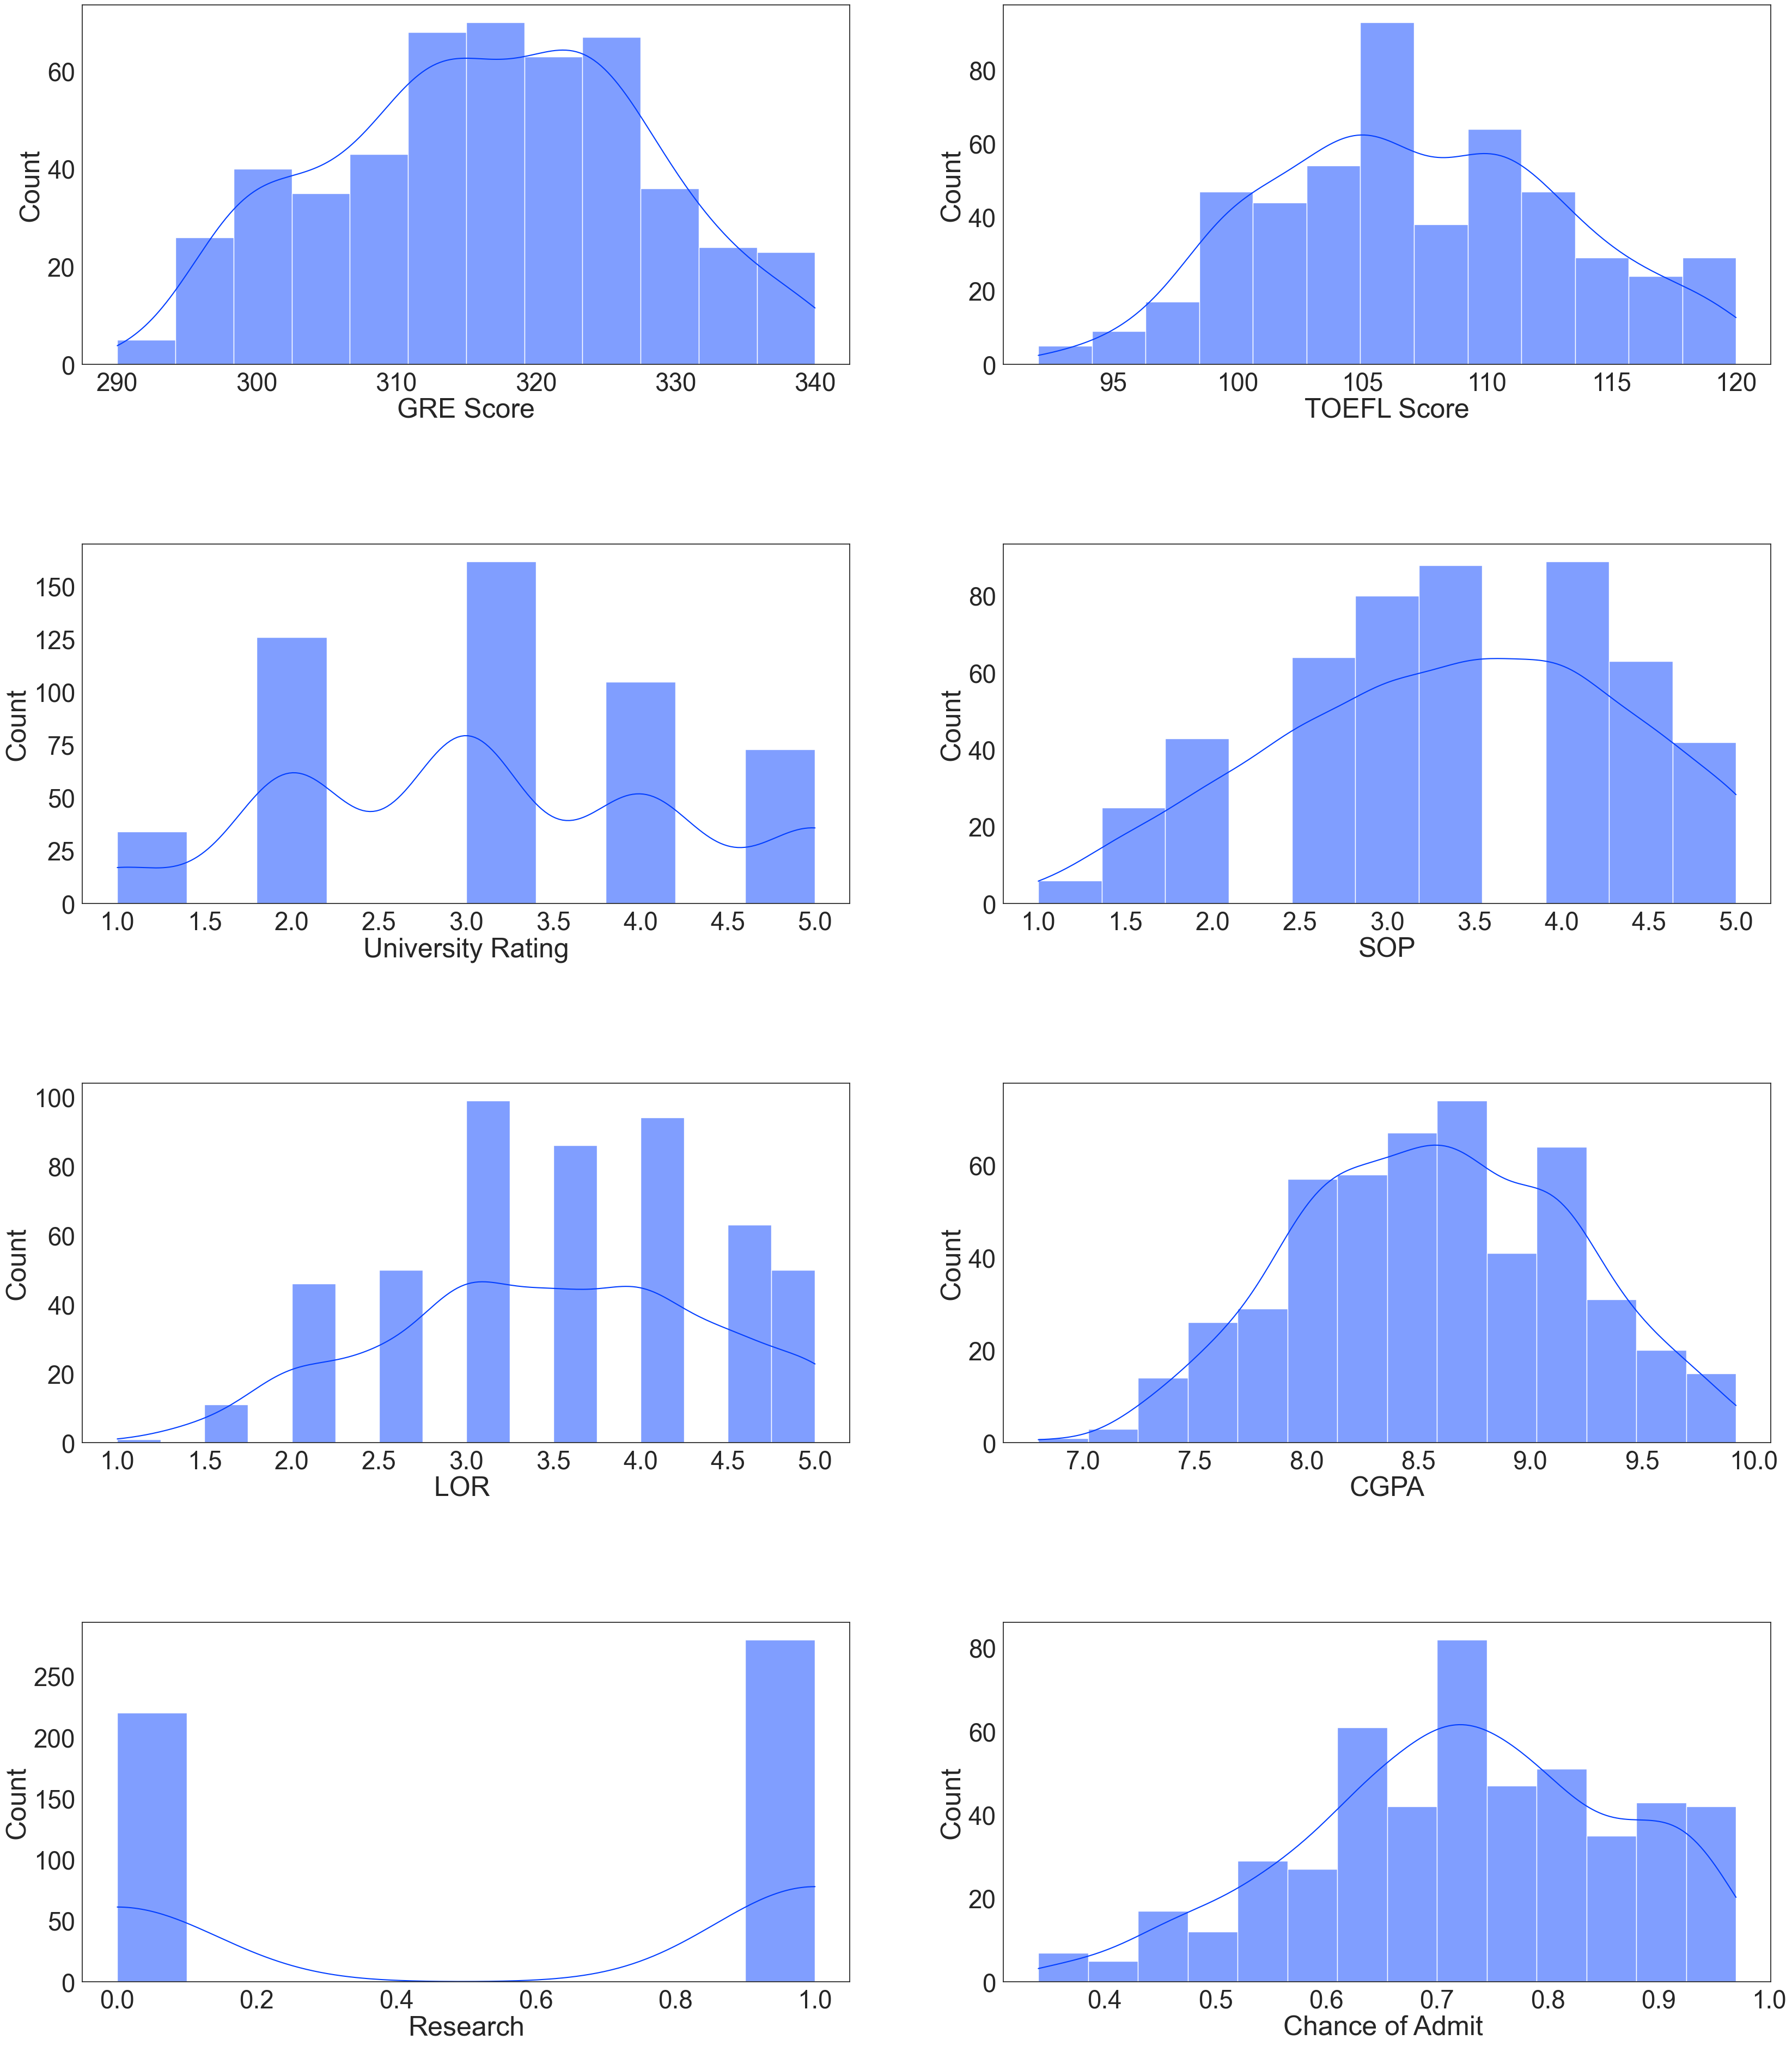

In [4]:
import warnings
warnings.filterwarnings("ignore")

from matplotlib import rcParams


feature_names = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']

rcParams['figure.figsize'] = 40, 60

sns.set(font_scale=3)
sns.set_style("white")
sns.set_palette("bright")

plt.subplots_adjust(hspace=0.5)

i = 1

for name in feature_names:
    plt.subplot(5, 2, i)
    sns.histplot(data=df_data, x=name, kde=True, palette="YlGnBu")
    i += 1

plt.show()


Podemos filtrarlo en base a la variable objetivo

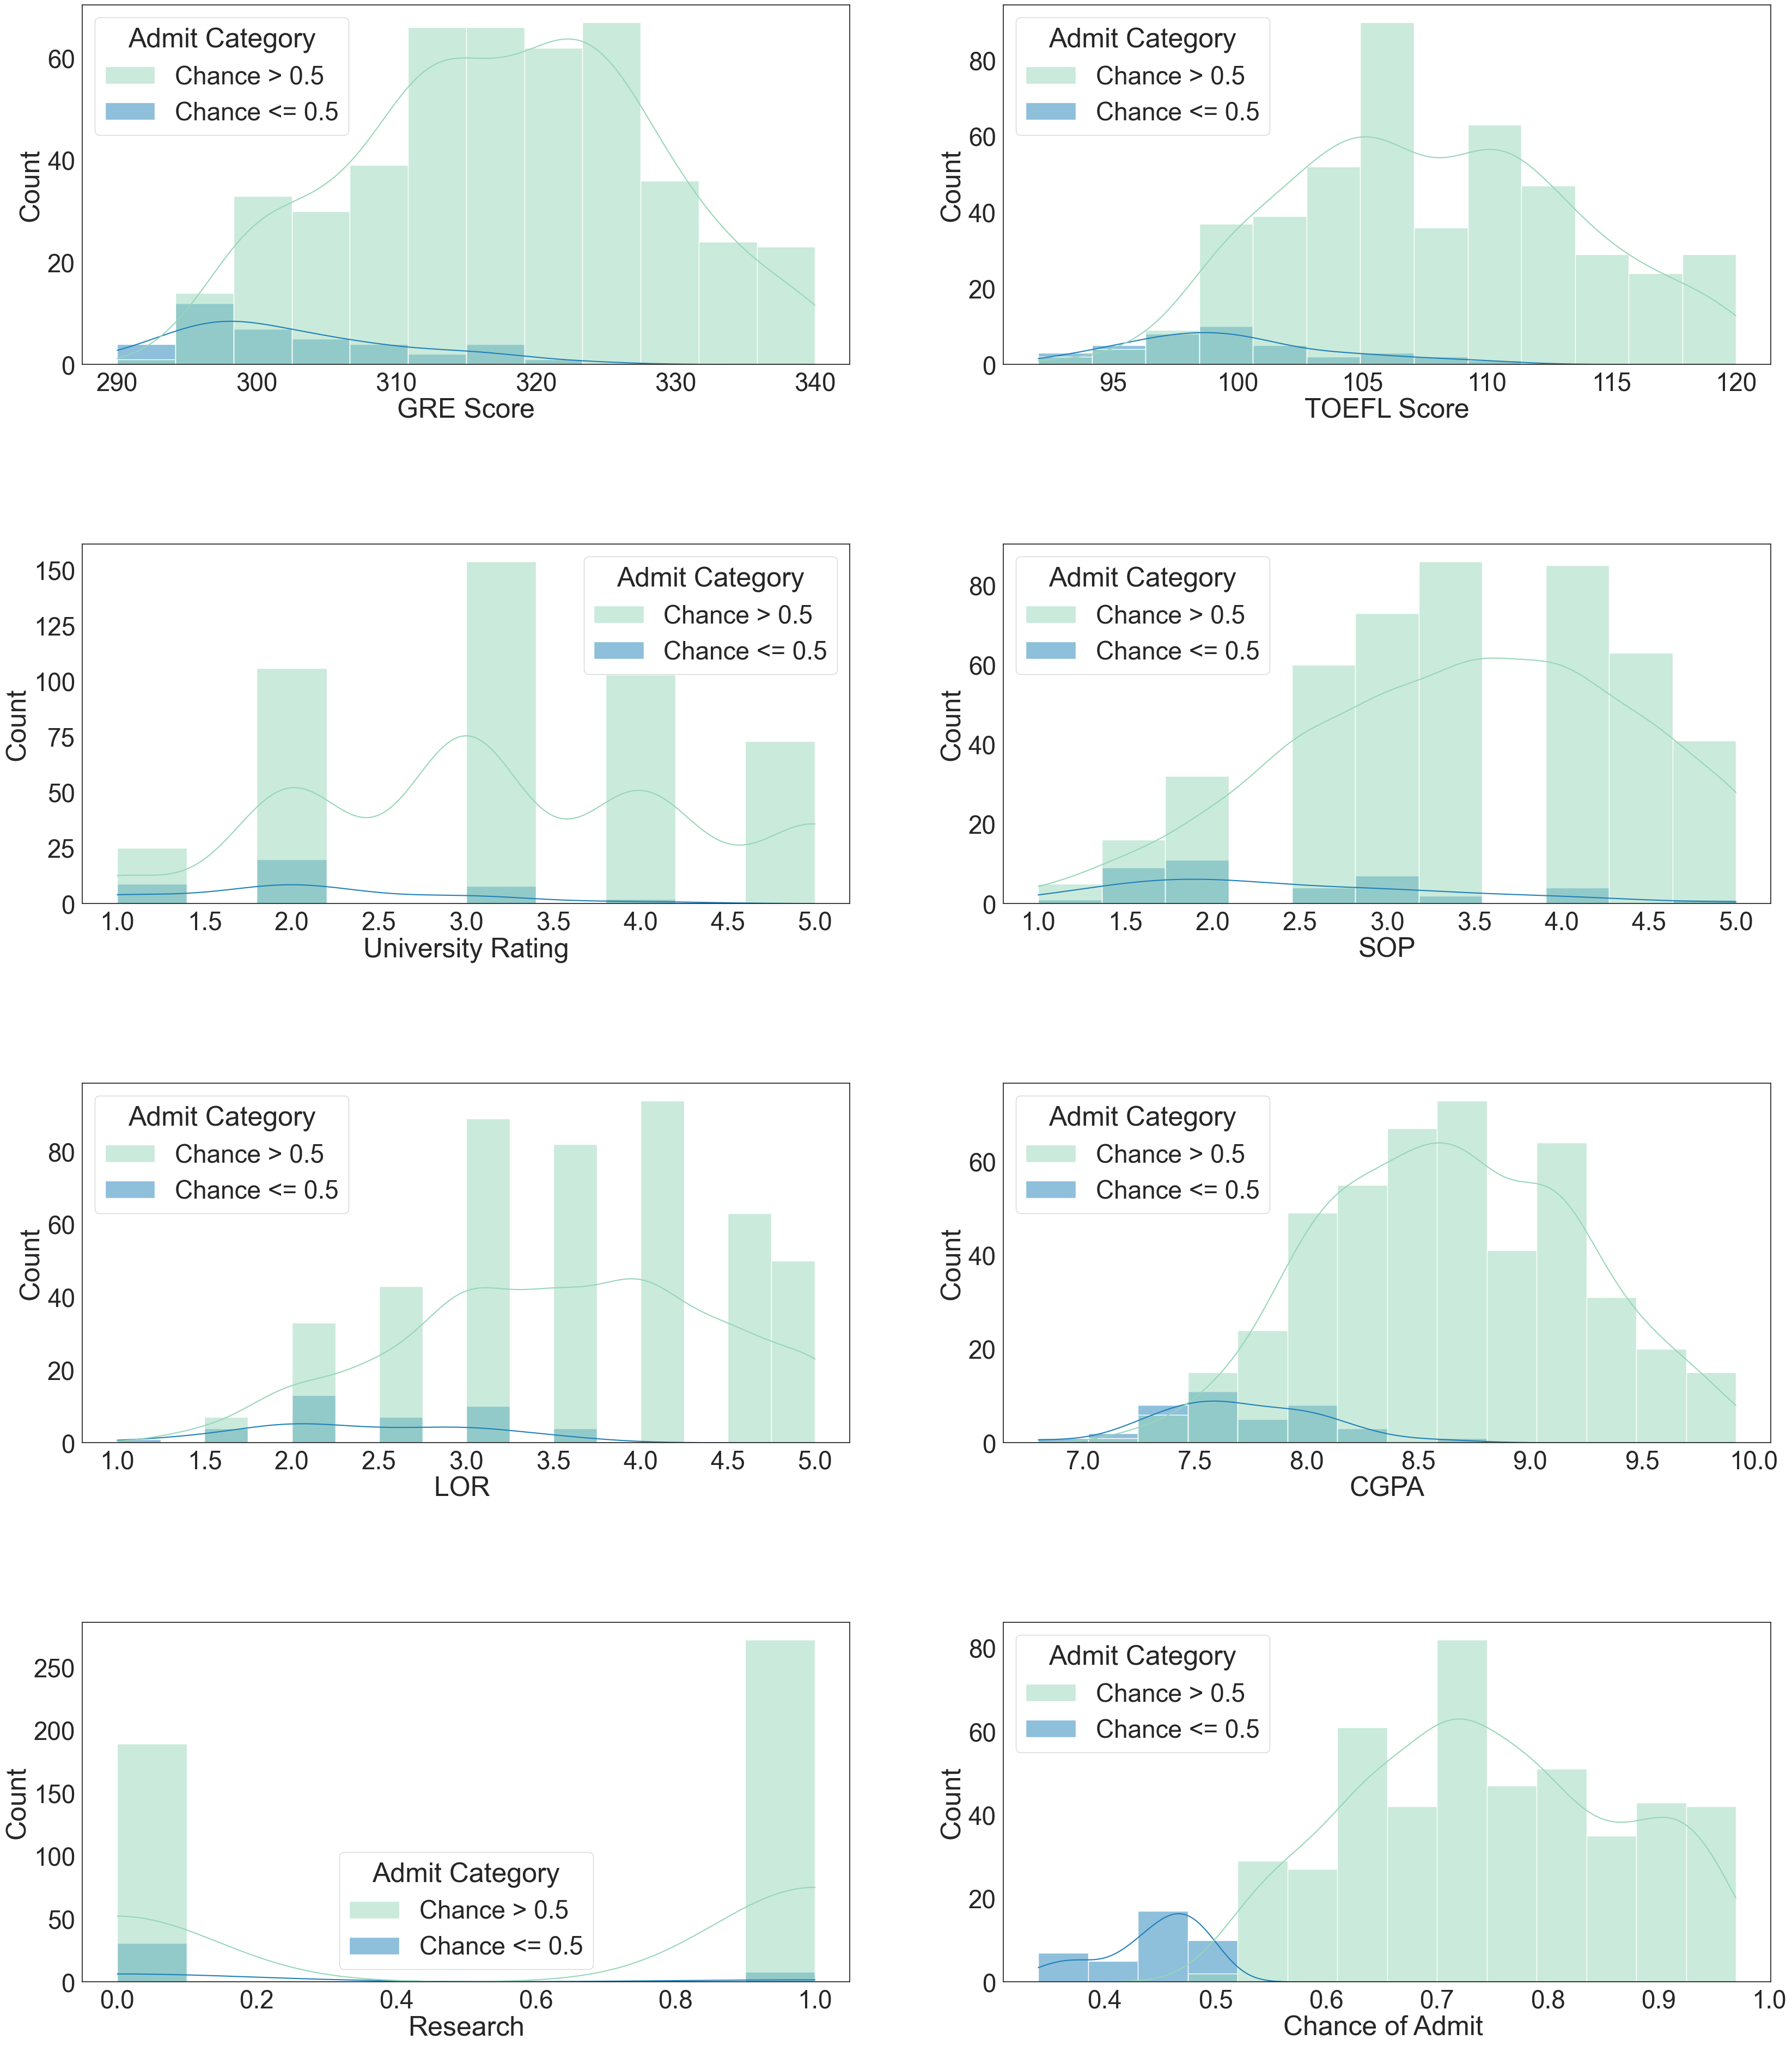

In [6]:
df_aux= df_data.copy()

df_aux['Admit Category'] = df_aux['Chance of Admit '].apply(lambda x: 'Chance > 0.5' if x > 0.5 else 'Chance <= 0.5')

feature_names = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']

rcParams['figure.figsize'] = 40, 60

sns.set(font_scale=3)
sns.set_style("white")
sns.set_palette("bright")

plt.subplots_adjust(hspace=0.5)

i = 1

for name in feature_names:
    plt.subplot(5, 2, i)
    sns.histplot(data=df_aux, x=name, hue='Admit Category', kde=True, palette="YlGnBu")
    i += 1

plt.show()


Tambien se entrega diferentes Boxplot de cada una de las caracteristicas


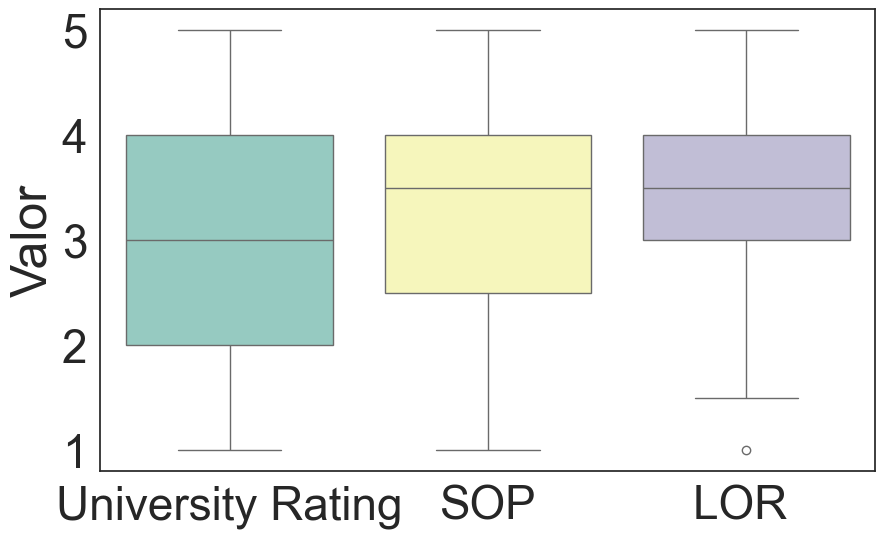

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_data[['University Rating', 'SOP', 'LOR ']], orient="v", palette="Set3")
plt.ylabel("Valor")
plt.xticks( )
plt.show()

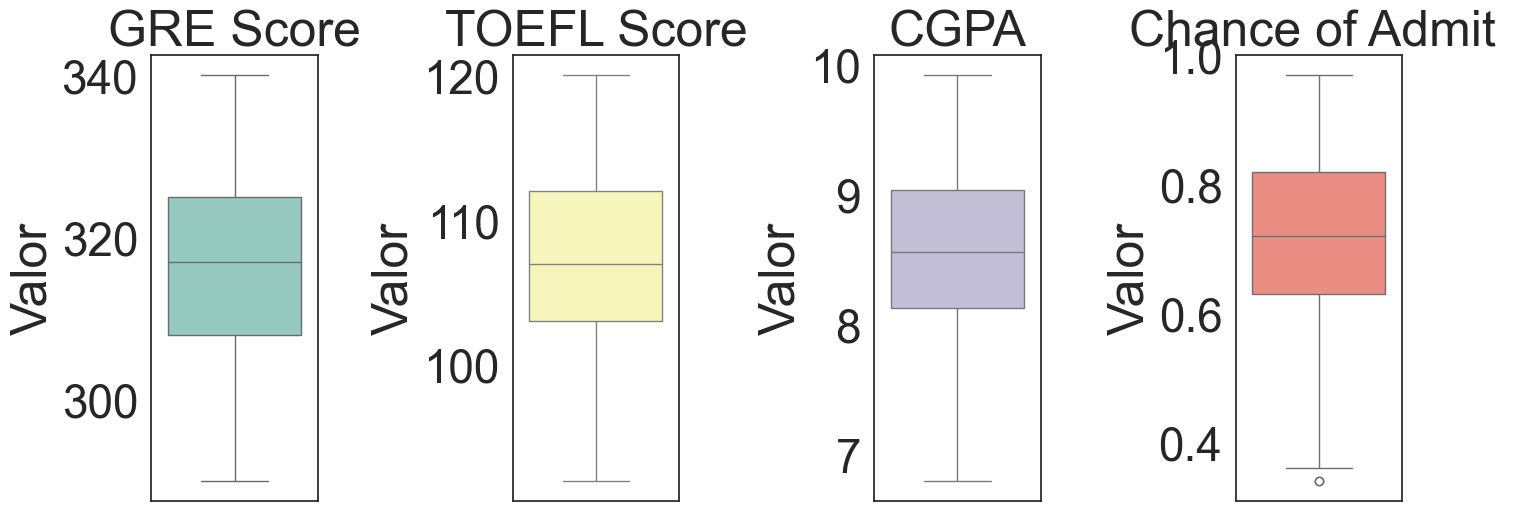

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit ']

set3_colors = sns.color_palette("Set3", n_colors=len(features))

fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(15, 6))

for i, feature in enumerate(features):
    sns.boxplot(data=df_data[feature], ax=axes[i], orient="v", color=set3_colors[i])
    axes[i].set_ylabel("Valor")
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()


## Modelo

Utilizaremos una regresion logistica para predecir la variable de interes

### Construccion del modelo

Si bien nuestra principal herramienta para la implementación de modelos de aprendizaje será la librería **sklearn**, encontramos útil construir nuestras propias funciones desde cero, ya que necesitaremos ciertas libertades en el proceso. Sin embargo, en su mayor parte, nos inclinaremos hacia **sklearn** debido a que su código está optimizado y ofrece una mayor completitud.

A continuación se presenta la implementacion de la *regresion logistica*

In [10]:

def sigmoid(z):
    """
    Función sigmoide para la regresión logística.
    """
    return 1 / (1 + np.exp(-z))

def estimator_fn(y, X, bias=True, max_iter=100, tol=0.0001, lambda_=1.0):
    """
    Estima los pesos de la regresión logística con regularización L2.
    
    Args:
    y: array, target.
    X: array, features.
    bias: bool, si True, se incluye el término de sesgo (intercept).
    max_iter: int, número máximo de iteraciones.
    tol: float, tolerancia para la convergencia.
    lambda_: float, parámetro de regularización.
    
    Returns:
    weights: array, pesos estimados.
    """
    if bias:
        X_ = np.c_[np.ones(shape=(len(y), 1)), X]
    else:
        X_ = X
    
    # Inicializar los pesos
    weights = np.zeros(X_.shape[1])
    
    # Iterar hasta que se alcance la convergencia
    for _ in range(max_iter):
        z = np.dot(X_, weights)
        p = sigmoid(z)
        W = np.diag(p * (1 - p))
        H = np.dot(X_.T, np.dot(W, X_)) + lambda_ * np.eye(X_.shape[1])
        gradient = np.dot(X_.T, y - p) - lambda_ * weights
        delta = np.linalg.solve(H, gradient)
        weights += delta
        
        # Verificar la convergencia
        if np.linalg.norm(delta) < tol:
            break
    
    return weights



def predictor_fn(X, weights, bias=True):
    """
    Predice las probabilidades utilizando el modelo de regresión logística.
    
    Args:
    X: array, features.
    weights: array, pesos del modelo de regresión logística.
    bias: bool, si True, se incluye el término de sesgo (intercept).
    
    Returns:
    probs: array, probabilidades predichas.
    """
    if bias:
        X_ = np.c_[np.ones(shape=(len(X), 1)), X]
    else:
        X_ = X
    z = np.dot(X_, weights)
    probs = sigmoid(z)
    return probs


In [11]:
def negative_log_likelihood(y, probs):
    """
    Calcula la pérdida de la probabilidad logarítmica negativa.
    
    Args:
    y: array, probabilidades reales (entre 0 y 1).
    probs: array, probabilidades predichas por el modelo.
    
    Returns:
    loss: float, pérdida de la probabilidad logarítmica negativa.
    """
    # Calcula la pérdida de la probabilidad logarítmica negativa
    loss = -np.mean(y * np.log(probs) + (1 - y) * np.log(1 - probs))
    return loss


Dividimos los datos entre entrenamiento y testeo

In [14]:
X=df_data[df_data.columns[:-1]]

y=df_data[df_data.columns[-1]]
y = np.where(y >= 0.5, 1, 0)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42)

N = len(y_train)

Usando nuestra propia construccion de modelo, tenemos el mismo resultado que usando la libreria sklearn para el caso insesgado.
Para el caso segado (con intercepto), hay leves diferencias. La razon puede ser la inicializacion de parametros entre otros detalles
que pueda realizar internamente la libreria sklearn

In [15]:
params = []  

idx = np.arange(0, N)

for i in idx:
    
    mask = idx != i

    beta = estimator_fn(y_train[mask], X_train.iloc[mask, :], False)
    params.append(beta)  # store it


In [16]:
params

[array([-0.0973664 ,  0.12718779, -0.04652578, -0.05465285,  0.58977966,
         2.20127477,  0.34485879]),
 array([-0.09728929,  0.12705504, -0.0460276 , -0.05489745,  0.58897872,
         2.20000615,  0.3475561 ]),
 array([-0.09733268,  0.12642721, -0.05979895, -0.05164212,  0.59757546,
         2.20959466,  0.33461156]),
 array([-0.09744197,  0.12748997, -0.04527802, -0.0575687 ,  0.58557226,
         2.20201657,  0.34920111]),
 array([-0.09741841,  0.12724019, -0.04609423, -0.05436931,  0.58931317,
         2.20255754,  0.34592441]),
 array([-0.09805698,  0.12852028, -0.05319475, -0.08974343,  0.6124722 ,
         2.21390903,  0.3731261 ]),
 array([-0.09723637,  0.12721785, -0.05388033, -0.04529845,  0.59136718,
         2.19331767,  0.35347871]),
 array([-0.09737271,  0.12725952, -0.04679296, -0.05482461,  0.58980756,
         2.20071665,  0.34451538]),
 array([-0.09729141,  0.12700226, -0.04590114, -0.05401547,  0.58995617,
         2.2002951 ,  0.34409473]),
 array([-0.0974403 

In [17]:
from sklearn.linear_model import LogisticRegression

params = []  

idx = np.arange(0, N)

for i in idx:
    mask = idx != i

    clf = LogisticRegression(
    fit_intercept=False,    # Incluir el término de sesgo (intercept)
    )

    clf.fit( X_train.iloc[mask, :],y_train[mask])
    beta = clf.coef_
    params.append(beta)  


In [18]:
params

[array([[-0.09736621,  0.12724826, -0.04802206, -0.05403107,  0.58922057,
          2.20058871,  0.35206732]]),
 array([[-0.09735192,  0.12730856, -0.04805568, -0.05299058,  0.58822767,
          2.19917162,  0.3526197 ]]),
 array([[-0.0974387 ,  0.12652922, -0.06132696, -0.0507367 ,  0.59610875,
          2.21296461,  0.33593714]]),
 array([[-0.09742643,  0.1274622 , -0.04535562, -0.05759293,  0.58583355,
          2.20171526,  0.34918112]]),
 array([[-0.0975054 ,  0.12723291, -0.04665551, -0.05470159,  0.58746515,
          2.20661515,  0.35227327]]),
 array([[-0.0981568 ,  0.12907749, -0.05632567, -0.08926912,  0.614262  ,
          2.21087435,  0.37273675]]),
 array([[-0.09721495,  0.1271417 , -0.05541281, -0.04632407,  0.59382296,
          2.19310683,  0.36059036]]),
 array([[-0.0974608 ,  0.12746351, -0.04900085, -0.0544515 ,  0.5900545 ,
          2.20157257,  0.35184206]]),
 array([[-0.09730887,  0.12708894, -0.04691997, -0.05394533,  0.58887023,
          2.20027186,  0.34919

## Uso del Modelo

En esta seccion usaremos el modelo de Regresion Logistica como tal

In [19]:
X=df_data[df_data.columns[:-1]]

y=df_data[df_data.columns[-1]]
y = np.where(y >= 0.5, 1, 0)    #Realizaremos un cambio en la variable de interes, debido a restricciones del modelo

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42)

N = len(y_train)

In [20]:
from sklearn.linear_model import LogisticRegression

params = []  
idx = np.arange(0, N)

for i in idx:
    mask = idx != i

    clf = LogisticRegression(
    fit_intercept=True,    # Incluir el término de sesgo (intercept)
    )
    clf.fit( X_train.iloc[mask, :],y_train[mask])
    beta = np.append(clf.intercept_,clf.coef_)
    params.append(beta)  
params = np.vstack(params)  

In [22]:
params

array([[-0.74109021, -0.08951433,  0.12475941, ...,  0.61035291,
         2.03297709,  0.28438465],
       [-0.38186429, -0.09531468,  0.12468175, ...,  0.60718874,
         2.19717476,  0.34941308],
       [-0.54582437, -0.10075207,  0.13162062, ...,  0.63476939,
         2.35111281,  0.3337799 ],
       ...,
       [-0.44807308, -0.09698578,  0.11575689, ...,  0.60319396,
         2.35686903,  0.3708624 ],
       [-0.93106564, -0.09324547,  0.13760244, ...,  0.5102618 ,
         2.04524742,  0.28116662],
       [-2.47323917, -0.09191199,  0.13606731, ...,  0.51035168,
         2.16900405,  0.13528836]])

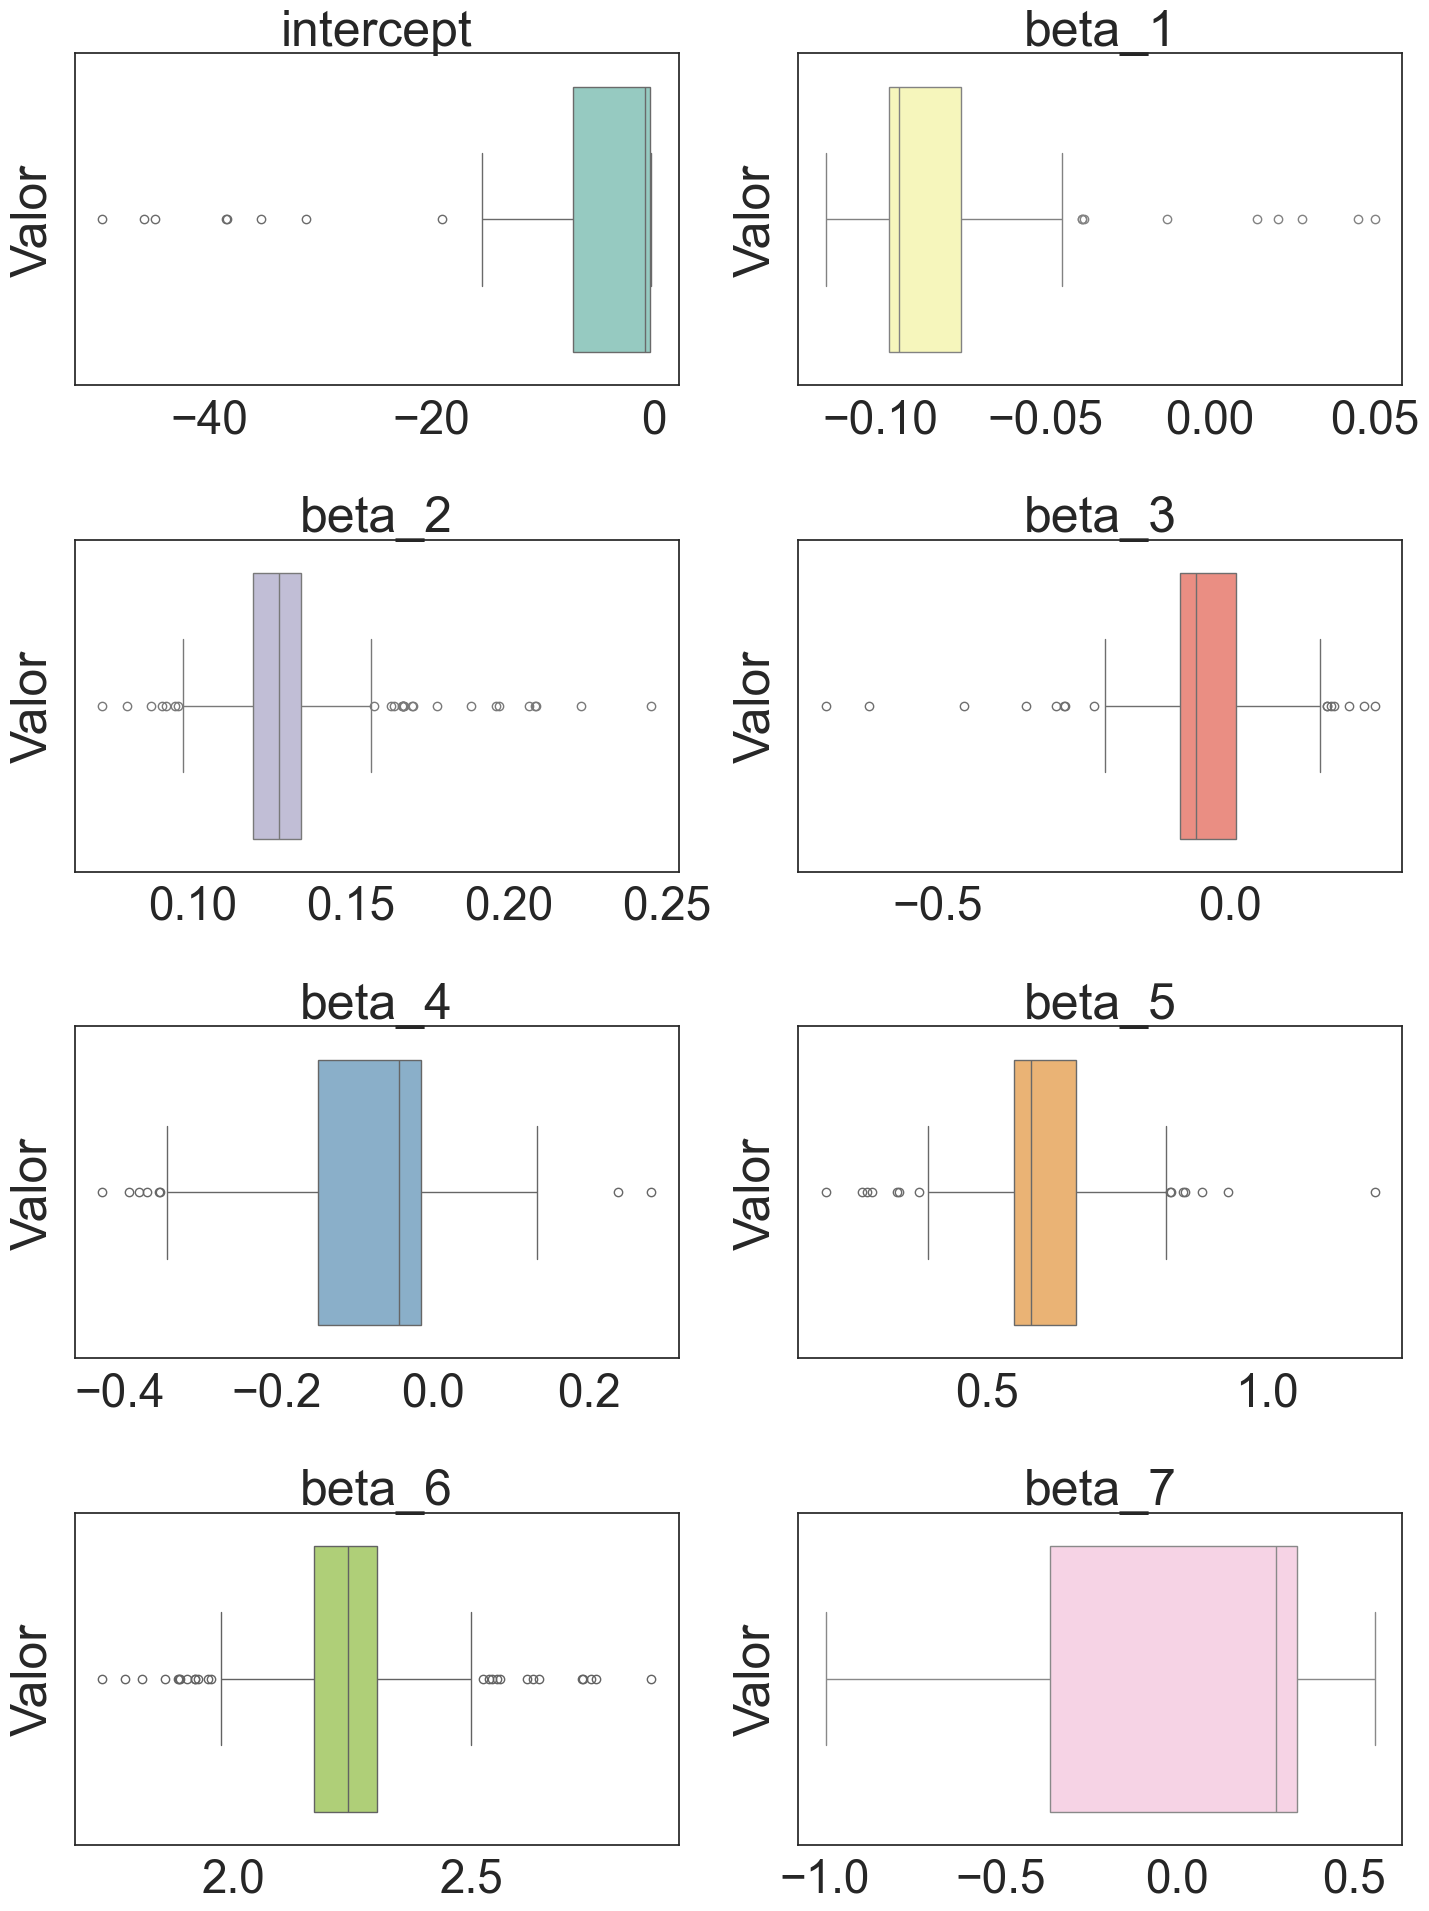

In [23]:
features = ['intercept', 'beta_1', 'beta_2', 'beta_3', 'beta_4', 'beta_5', 'beta_6', 'beta_7']
set3_colors = sns.color_palette("Set3", n_colors=len(features))

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(x=params[:,i], ax=axes[i], orient='v', color=set3_colors[i])
    axes[i].set_ylabel("Valor")
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()


## Jackknife

Los parámetros/pesos de las submuestras se usaran de la siguiente manera:

- $\theta_{biased}$ : Estimación Sesgada del Jackknife (media de los pesos)
- $SE(\theta)$ : Error Estándar del Jackknife (desviación estándar de los pesos)
- $SE(\theta) / |\theta_{biased}|$ : Indicador rápido de la estabilidad de los parámetros/pesos

Y finalmente,

- $\theta_{jack}$ : Estimación del Jackknife Corregida por Sesgo (que vamos a utilizar como parámetros/pesos del modelo)
- Test de Hipotesis de Jackknife (rechaza todo el modelo si algún parámetro/peso es inestable)

### Estimaciones de Jackknife


La **Estimación Sesgada del Jackknife** es la media de una estimación de parámetro específica (por ejemplo, la intersección) para todas las submuestras.

$$
\theta_{biased} = \frac{1}{n} \sum_{i=1}^n \theta_{(i)}
$$

En nuestro ejemplo, la Estimación Sesgada del Jackknife es

In [24]:
theta_biased = np.mean(params, axis=0)
theta_biased

array([-4.52389453, -0.08398417,  0.1292844 , -0.04692742, -0.0757256 ,
        0.59844448,  2.24140659,  0.04024859])


El núcleo del procedimiento del Jackknife es la pregunta sobre qué tan estables son realmente los parámetros del modelo.
El **Error Estándar (SE) de las Estimaciones del Jackknife** es

$$
SE(\theta) = \sqrt{ \frac{n - 1}{n} \sum_{i=1}^n \left(\theta_{(i)} - \theta_{biased}\right)^2 }
$$

In [25]:
def SE_jack(theta_i, theta_biased):
    return np.sqrt( (N-1)/N * np.sum((theta_i - theta_biased)**2, axis=0) )

In [26]:
se_jack= SE_jack(params , theta_biased)
se_jack

array([118.81811524,   0.36163571,   0.3335217 ,   1.6672399 ,
         1.67871195,   1.75056726,   2.53409104,   6.36546919])

**Indicador Rápido de la Estabilidad de Parámetros/Pesos**
¿Qué parámetros son los más inestables?
No es realmente científico, pero ya podemos adivinar estimaciones de parámetros potencialmente inestables sin corrección de sesgo mediante

$$
\frac{SE(\theta)}{|\theta_{biased}|}
$$

Un bajo error estándar por valor absoluto del parámetro es deseable (menor es mejor o más estable).
En nuestro ejemplo, la intersección parece problemática, al igual que beta_3 y beta_7

In [27]:
se_jack / abs(theta_biased)

array([ 26.26456349,   4.30599854,   2.57975199,  35.52805205,
        22.16835459,   2.92519578,   1.1305807 , 158.15385962])


La **estimación del Jackknife sin sesgo** o **estimación del Jackknife corregida por sesgo** es la estimación del parámetro de la muestra completa menos una corrección de sesgo específica del Jackknife.

$$
\theta_{jack} = \theta_{all} - bias_{jack}
$$

Primero, vamos a estimar el modelo en la muestra completa.

In [28]:
clf = LogisticRegression(
    fit_intercept=True,    # Incluir el término de sesgo (intercept)
    )

clf.fit( X_train,y_train)
theta_all= np.append(clf.intercept_,clf.coef_)
theta_all

array([-0.51975097, -0.09528736,  0.12762736, -0.02444062, -0.10254568,
        0.54559083,  2.20451027,  0.33744068])

Luego $bias_{jack}$ es

$$
bias_{jack} = (n - 1) (\theta_{biased}-\theta_{all} )
$$

In [29]:
bias_jack = (N - 1) * (theta_biased - theta_all)
bias_jack

array([-9.97031748e+02,  2.81449510e+00,  4.12604829e-01, -5.59921334e+00,
        6.67820052e+00,  1.31605580e+01,  9.18718345e+00, -7.40008321e+01])

Asi $\theta_{jack}$

In [30]:
theta_jack = theta_all - bias_jack
theta_jack

array([ 9.96511997e+02, -2.90978247e+00, -2.84977474e-01,  5.57477271e+00,
       -6.78074620e+00, -1.26149672e+01, -6.98267318e+00,  7.43382727e+01])

O equivalentemente reemplazando en las formulas

$$
\theta_{jack} = n \, \theta_{all} - (n - 1) \, \theta_{biased}
$$



In [31]:
theta_jack = N * theta_all - (N - 1) * theta_biased
theta_jack

array([ 9.96511997e+02, -2.90978247e+00, -2.84977474e-01,  5.57477271e+00,
       -6.78074620e+00, -1.26149672e+01, -6.98267318e+00,  7.43382727e+01])

### Test de Hipotesis

¿Qué sucede si intentamos llevar esta idea más allá y usar los pseudovalores para construir un intervalo de confianza? Un enfoque razonable sería formar un intervalo
$$
\tilde{\theta} \pm t_{n-1}^{(1-\alpha)} \widehat{\mathrm{se}}_{\mathrm{jack}},
$$
donde $t_{n-1}^{(1-\alpha)}$ es el percentil $(1-\alpha)$ de la distribución $t$ con $n-1$ grados de libertad. Resulta que este intervalo no funciona muy bien: en particular, no es significativamente mejor que intervalos más rudimentarios basados en la teoría normal. Se necesitan enfoques más refinados para la construcción de intervalos de confianza, como se describe en los Capítulos 12-14 del libro de Bradley Efron, R.J. Tibshirani (1993), "An Introduction to the Bootstrap".

Basados en lo anterior, usaremos un intervalo basado en la teoria normal que es usalmente mas vista implementadas en paquetes como el paquete para python [Astropy](https://docs.astropy.org/en/stable/api/astropy.stats.jackknife_stats.html) en su seccion de Jackknife

Usaremos un intervalo del 95\%

In [46]:
from scipy.special import erfinv

z_score = np.sqrt(2.0) * erfinv(0.95)
conf_interval = theta_jack + z_score * np.array((-se_jack, se_jack))
conf_interval.T

array([[ 7.63632771e+02,  1.22939122e+03],
       [-3.61857544e+00, -2.20098949e+00],
       [-9.38667986e-01,  3.68713038e-01],
       [ 2.30704255e+00,  8.84250288e+00],
       [-1.00709612e+01, -3.49053125e+00],
       [-1.60460159e+01, -9.18391837e+00],
       [-1.19494003e+01, -2.01594602e+00],
       [ 6.18621824e+01,  8.68143631e+01]])

In [47]:
test_resumen=pd.DataFrame()

test_resumen["Coeficientes"]= theta_all
test_resumen['Coeficientes Jack']= theta_jack
test_resumen['STD Jack']= se_jack
test_resumen['Intervalo izq']= [x[0] for x in conf_interval.T]
test_resumen['Intervalo der']=[x[1] for x in conf_interval.T]
test_resumen['En Intervalo'] = test_resumen.apply(lambda row: row['Intervalo izq'] <= row['Coeficientes'] <= row['Intervalo der'], axis=1)



In [48]:
test_resumen

,Coeficientes,Coeficientes Jack,STD Jack,Intervalo izq,Intervalo der,En Intervalo
0,-0.519751,996.511997,118.818115,763.632771,1229.391224,False
1,-0.095287,-2.909782,0.361636,-3.618575,-2.200989,False
2,0.127627,-0.284977,0.333522,-0.938668,0.368713,True
3,-0.024441,5.574773,1.667240,2.307043,8.842503,False
4,-0.102546,-6.780746,1.678712,-10.070961,-3.490531,False
5,0.545591,-12.614967,1.750567,-16.046016,-9.183918,False
6,2.204510,-6.982673,2.534091,-11.949400,-2.015946,False
7,0.337441,74.338273,6.365469,61.862182,86.814363,False


Y como ya habíamos sospechado, las estimaciones de parámetros de la intersección son simplemente aleatorias, es decir, las estimaciones de parámetros de la intersección en las submuestras del Jackknife simplemente ocurrieron por *casualidad*.

**Como consecuencia, se rechaza todo el modelo.**

## Prediccion

Notemos que la funcion **predictor_fn** es equivalente al .predict_proba usado en la funcion *LogisticRegression*  del paquete *ski-learn*, para la segunda coordenada (es decir, prediciremos la probabilidad de 1)

In [36]:
clf.classes_

array([0, 1])

<Figure size 200x100 with 0 Axes>

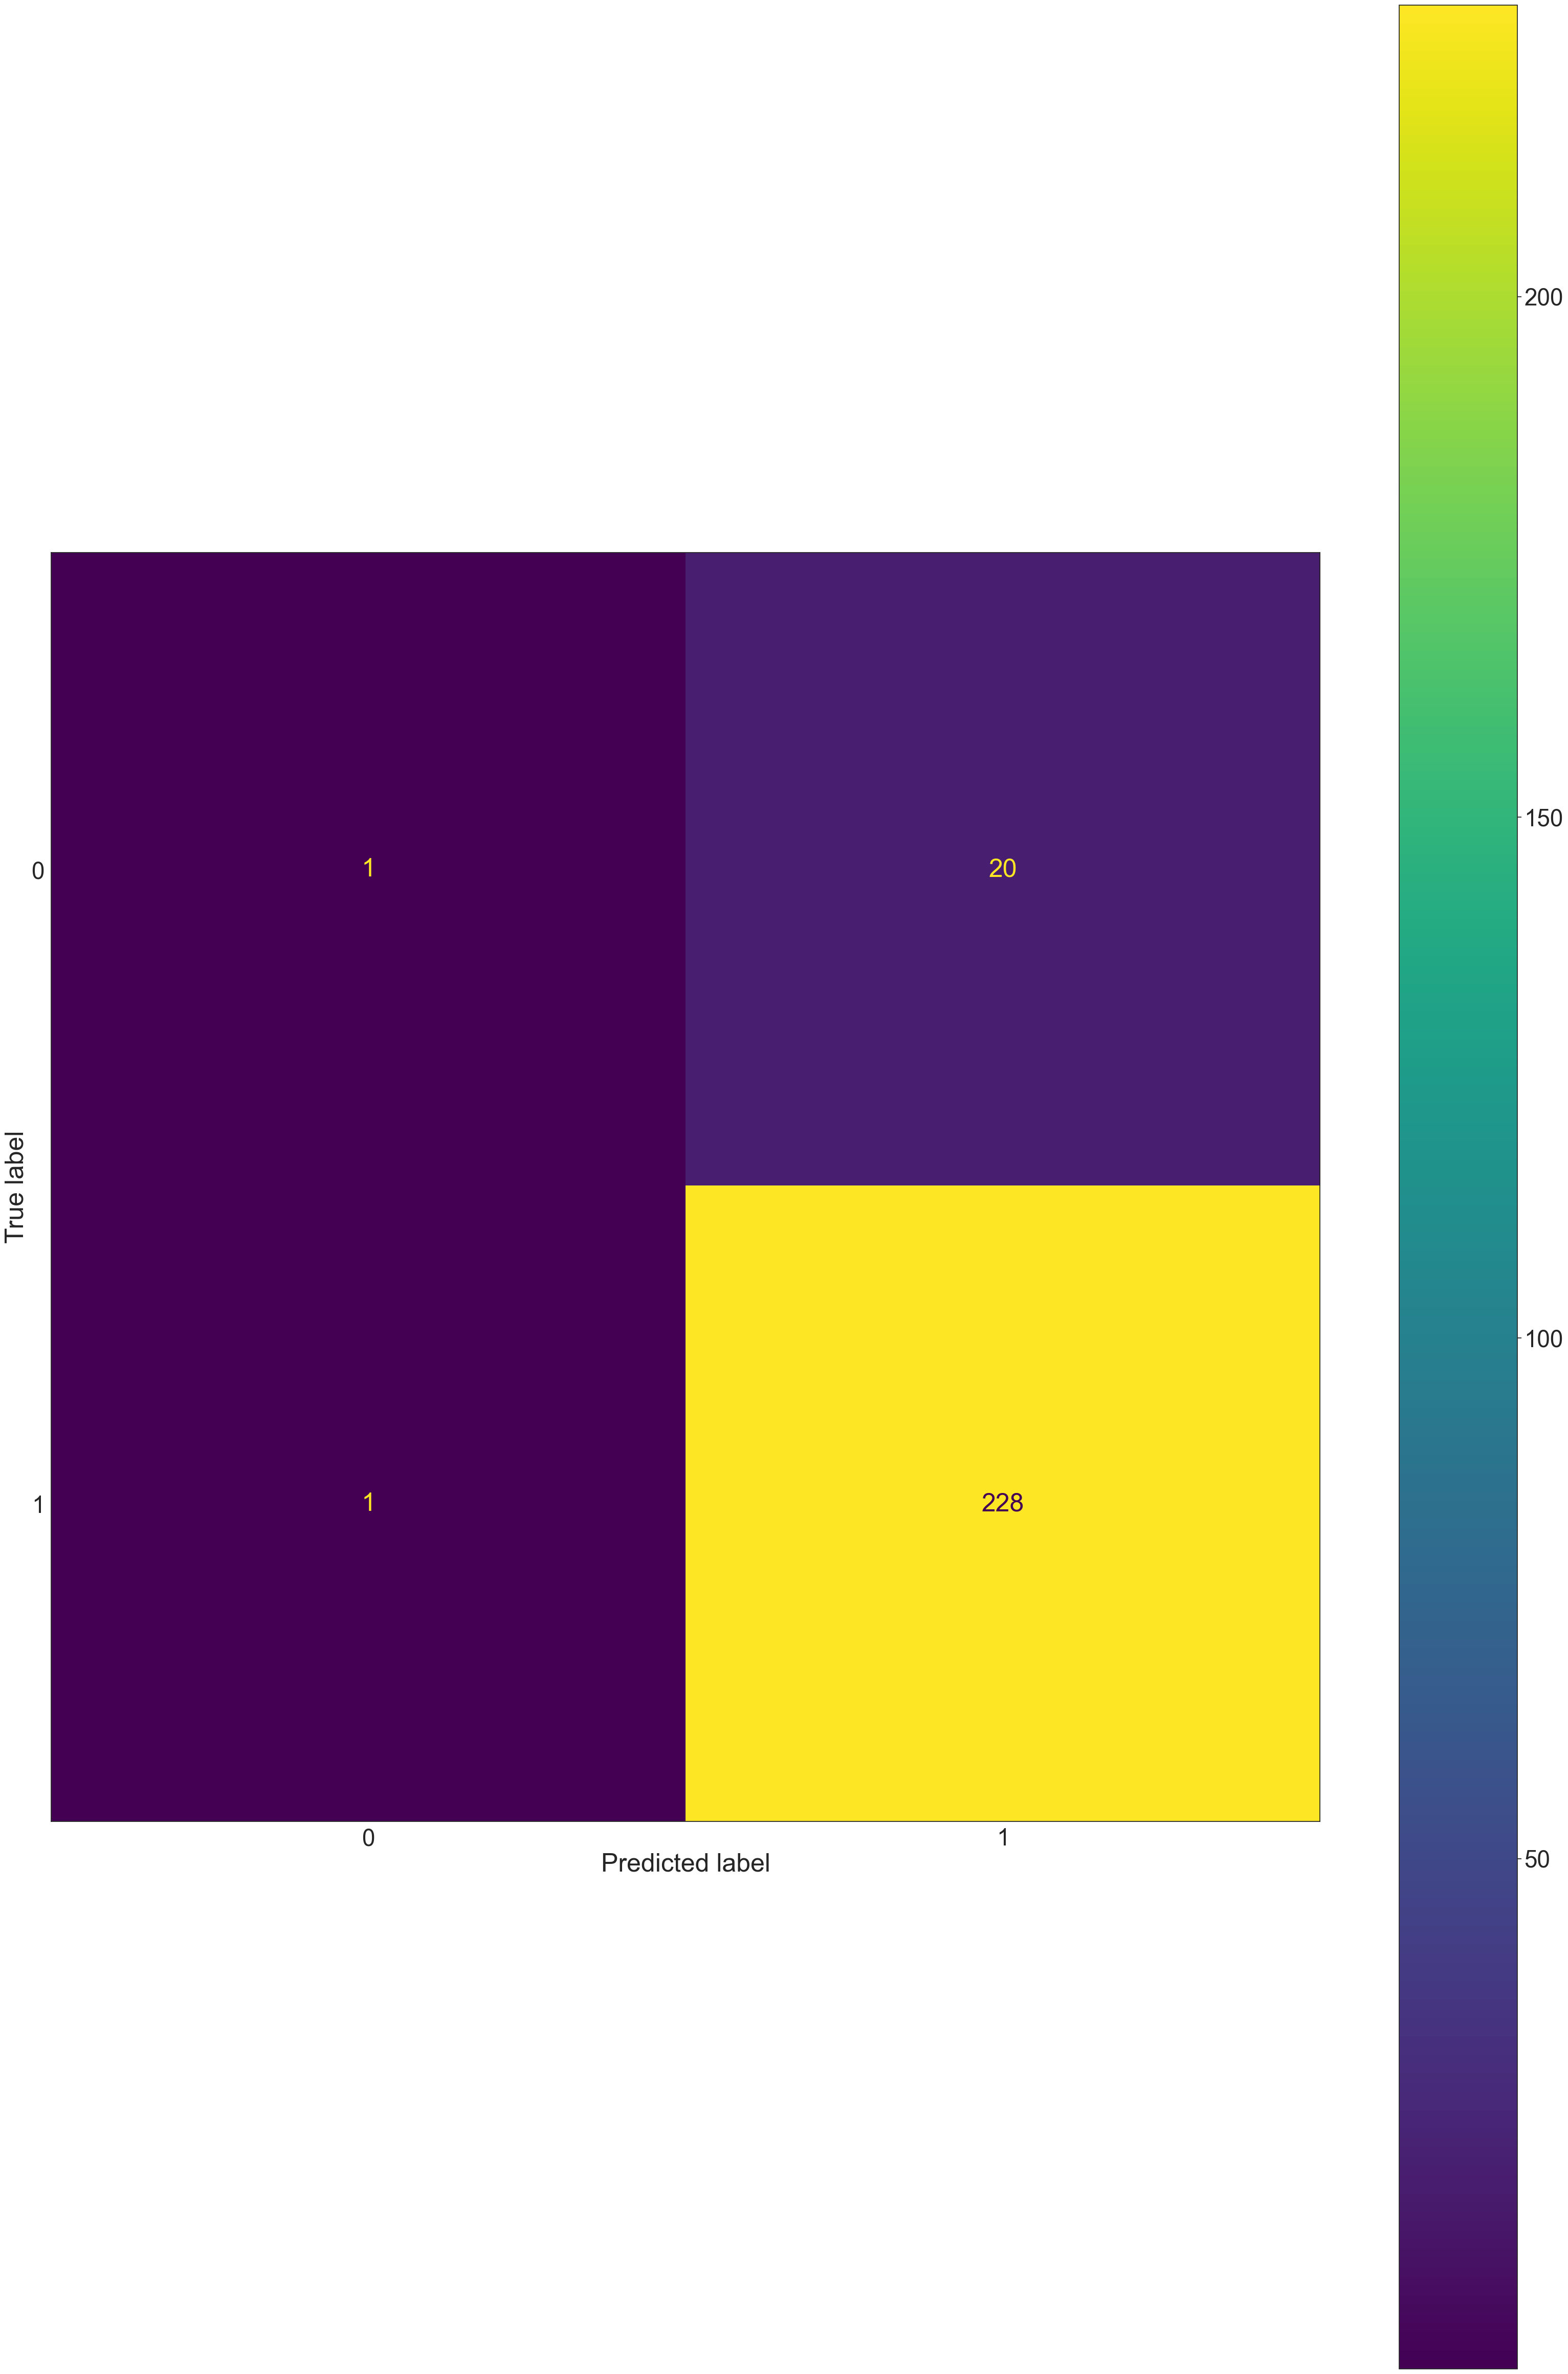

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred  = predictor_fn(X_test, theta_all)
y_pred_etiqueta = np.where(y_pred >= 0.5, 1, 0)
cm = confusion_matrix(y_test, y_pred_etiqueta, labels=clf.classes_)
plt.figure(figsize=(2,1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

<Figure size 200x100 with 0 Axes>

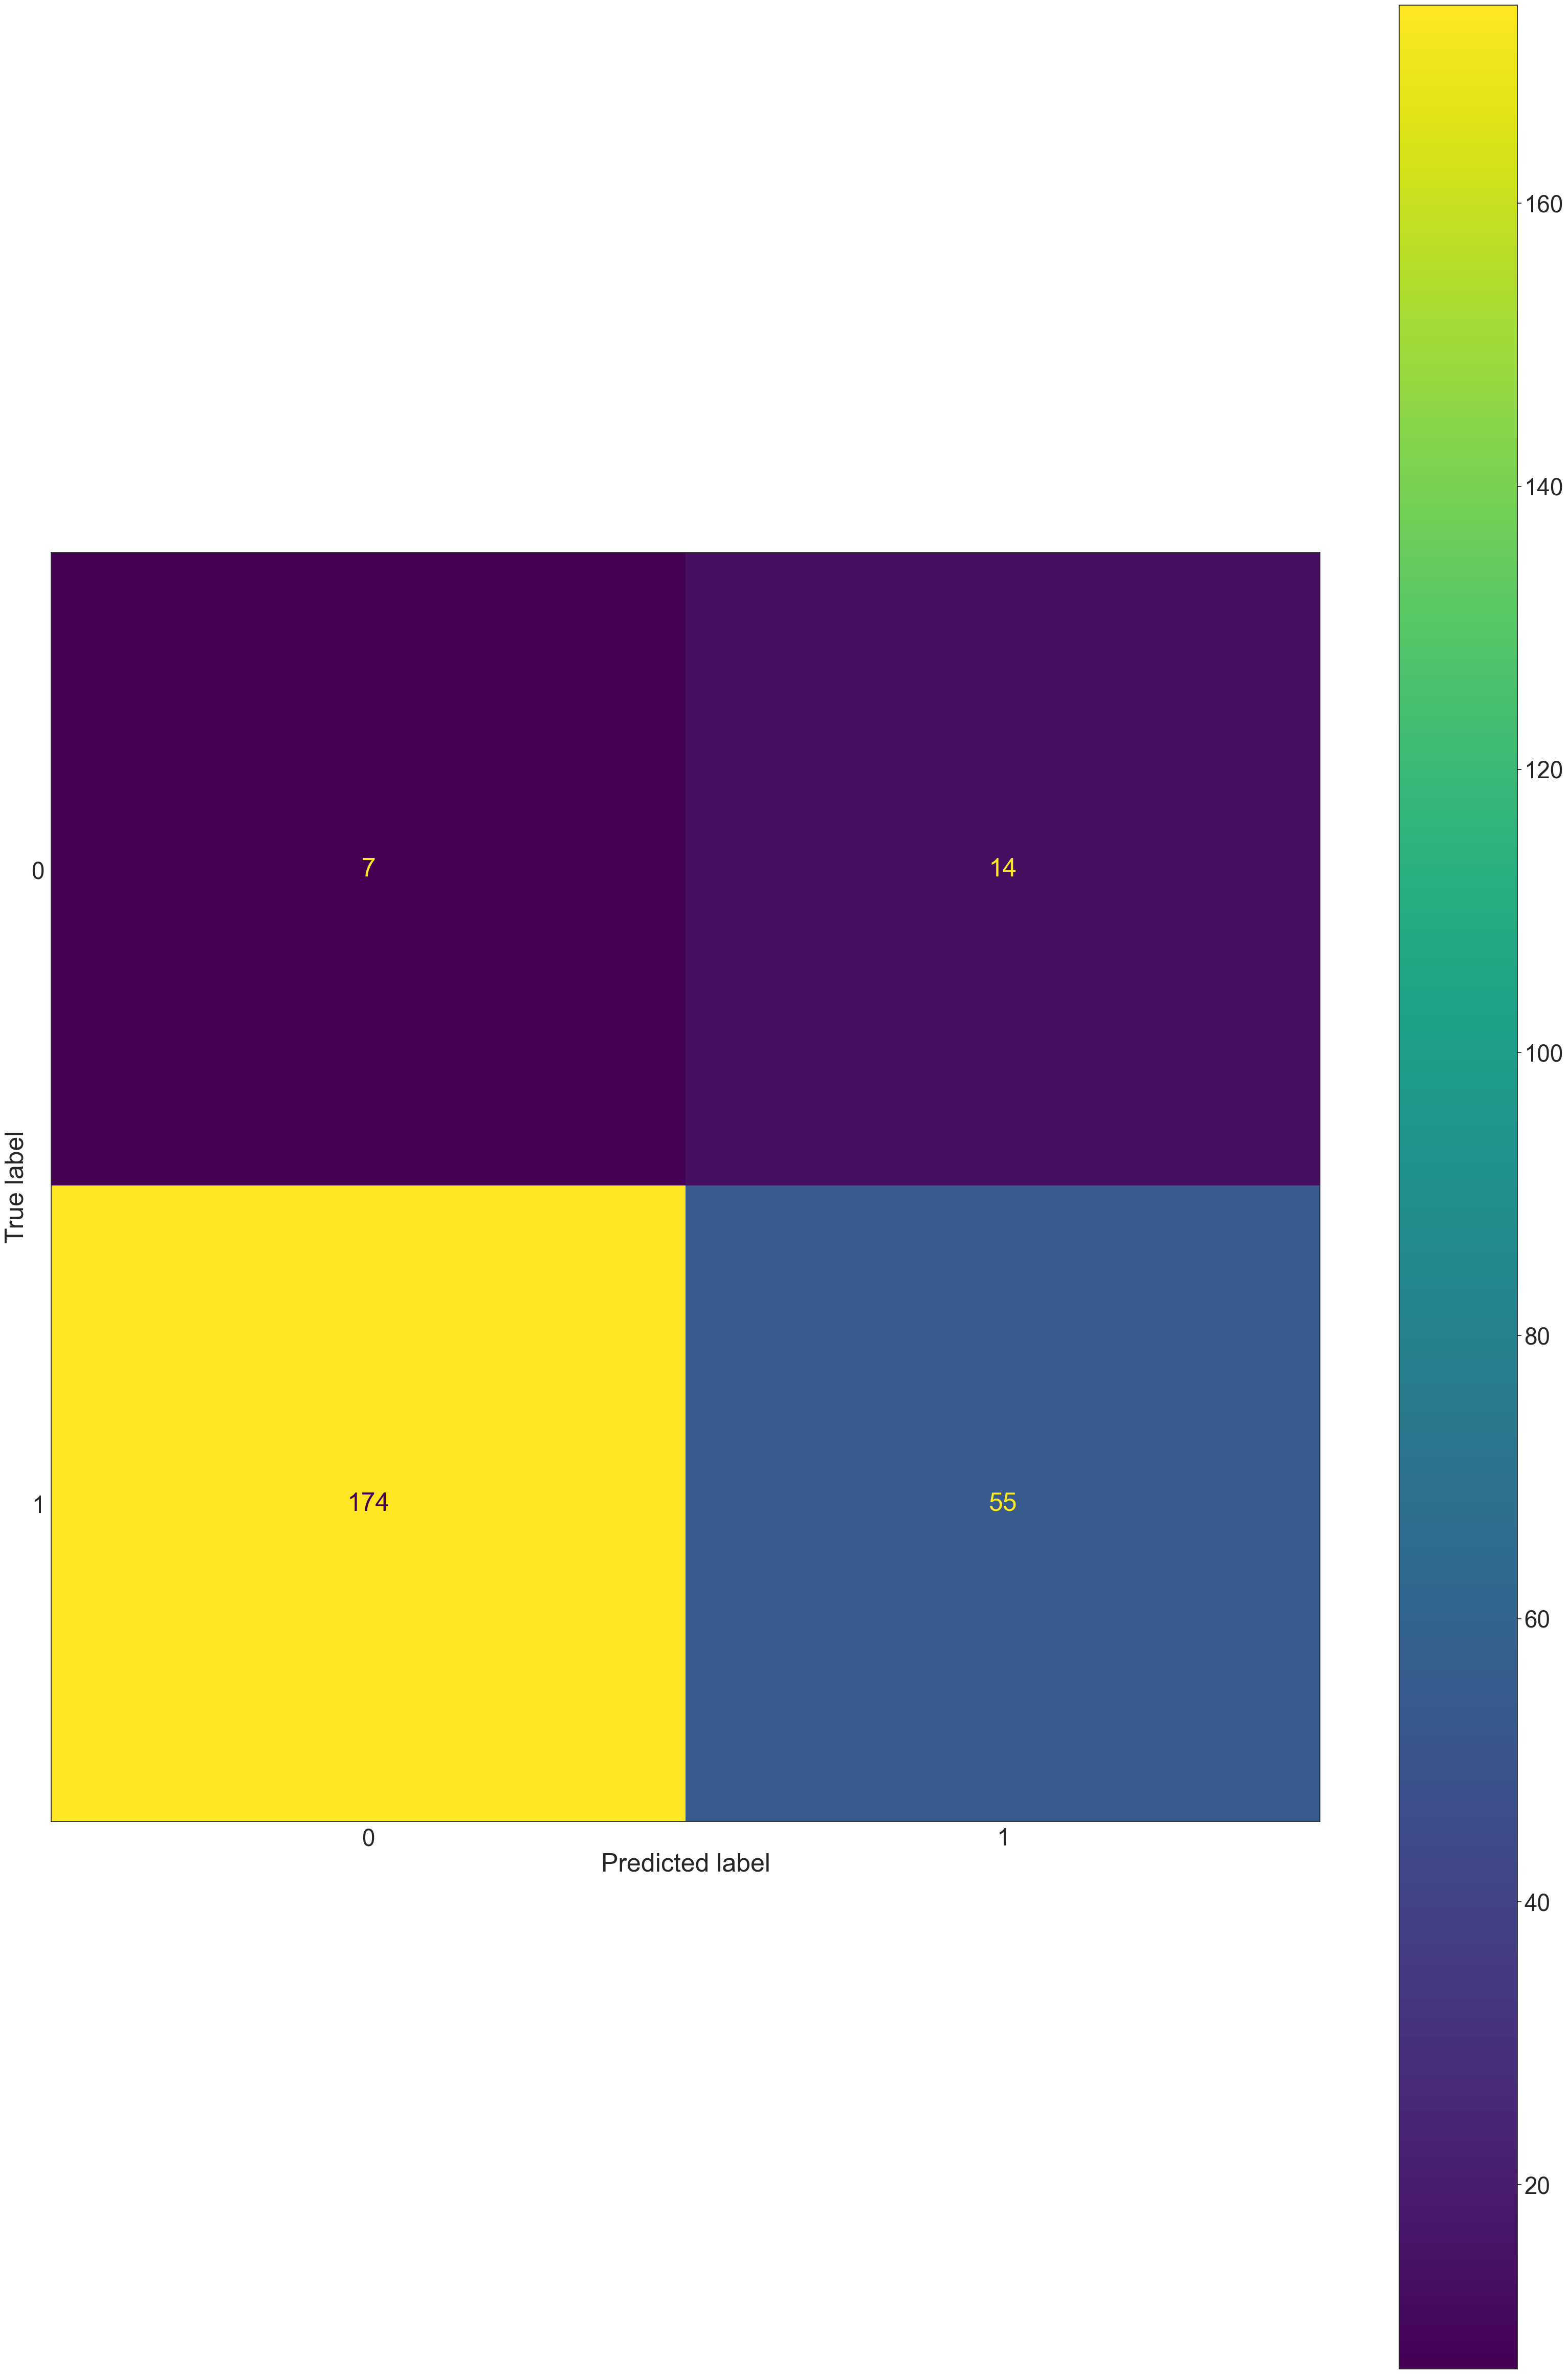

In [38]:
y_pred  = predictor_fn(X_test, theta_jack)
y_pred_etiqueta = np.where(y_pred >= 0.5, 1, 0)
cm = confusion_matrix(y_test, y_pred_etiqueta, labels=clf.classes_)
plt.figure(figsize=(2,1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

El rendimiento predictivo de la Regresión Lineal clásica y las Estimaciones del Jackknife no difieren realmente.
Y una vez más, destaca que el **Jackknife de Eliminación-1 es útil para encontrar parámetros inestables** (ver Prueba t del Jackknife) y rechazar un modelo especificado por ser potencialmente errático, sobreajustado, propenso a valores atípicos, etc. durante el desarrollo o la selección del modelo.

# Bibliografia
* Bradley Efron, R.J. Tibshirani (1993), "An Introduction to the Bootstrap", Chapter 11, [Google Books](https://books.google.de/books?id=gLlpIUxRntoC&lpg=PR14&ots=A9xuU4O5H5&lr&pg=PA141#v=onepage&q&f=false)
* Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019